In [1]:
import numpy as np
import pandas as pd

import random
import os
from tqdm import tqdm
from itertools import product
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
plt.style.use('_classic_test_patch')

In [4]:
df = pd.read_csv('dataset.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,label,S,Ag,Cr,Fe_Ka,Fe_Kb,Ar_Kb,Ca_Ka,Ni_Ka,Ni_kb,Cu_Ka,Cu_Kb,Zn_Ka,Zn_Kb,Pb_La,Pb_Lb,Ti,Nkr,Kr
0,1.75,0.231535,0.313065,0.545376,0.721069,0.729788,0.285071,0.492815,0.303459,0.500176,0.187549,0.201640,0.737144,0.737183,0.737475,0.556190,0.685554,0.193391,0.202682
1,1.47,0.012676,0.116311,0.793318,0.991717,0.989997,0.065601,0.511980,0.064954,0.516423,0.187322,0.193414,0.920373,0.906333,0.812522,0.473542,0.929378,0.019910,0.027779
2,1.39,0.037654,0.160137,0.827570,0.974607,0.979088,0.065373,0.563065,0.118139,0.494226,0.163690,0.181668,0.895705,0.885828,0.788664,0.399465,0.936216,0.019138,0.029954


In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,label,S,Ag,Cr,Fe_Ka,Fe_Kb,Ar_Kb,Ca_Ka,Ni_Ka,Ni_kb,Cu_Ka,Cu_Kb,Zn_Ka,Zn_Kb,Pb_La,Pb_Lb,Ti,Nkr,Kr
0,0.634021,0.231535,0.313065,0.545376,0.721069,0.729788,0.285071,0.492815,0.303459,0.500176,0.187549,0.201640,0.737144,0.737183,0.737475,0.556190,0.685554,0.193391,0.202682
1,0.489691,0.012676,0.116311,0.793318,0.991717,0.989997,0.065601,0.511980,0.064954,0.516423,0.187322,0.193414,0.920373,0.906333,0.812522,0.473542,0.929378,0.019910,0.027779
2,0.448454,0.037654,0.160137,0.827570,0.974607,0.979088,0.065373,0.563065,0.118139,0.494226,0.163690,0.181668,0.895705,0.885828,0.788664,0.399465,0.936216,0.019138,0.029954
3,1.000000,0.048364,0.058915,0.764076,1.000000,1.000000,0.056061,0.652656,0.108286,0.443447,0.212785,0.224492,0.906779,0.903560,0.836439,0.464816,0.977572,0.015380,0.019553
4,0.865979,0.009517,0.099478,0.712293,0.966873,0.968154,0.091002,0.756323,0.121018,0.450786,0.191769,0.196904,0.908752,0.892736,0.789741,0.479420,0.851971,0.016130,0.019575


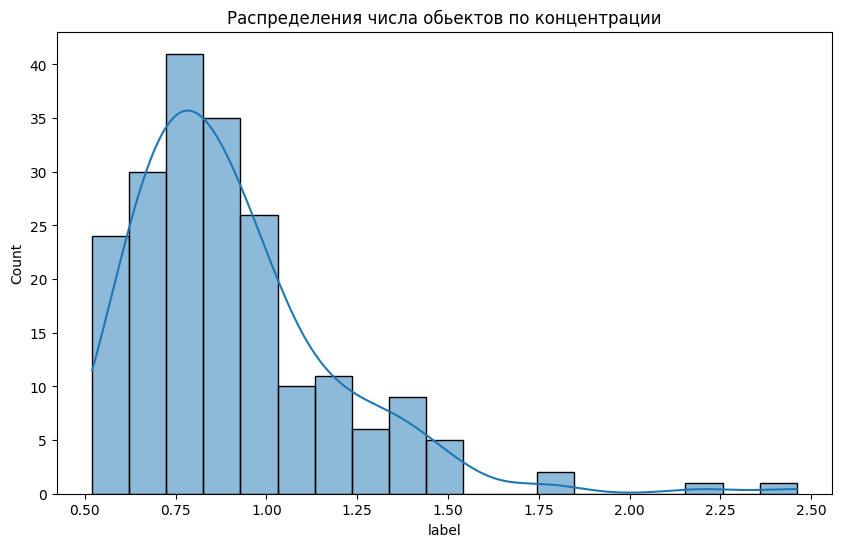

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['label'], kde=True)
plt.title('Распределения числа обьектов по концентрации')
plt.show()

In [7]:
df.columns

Index(['label', 'S', 'Ag', 'Cr', 'Fe_Ka', 'Fe_Kb', 'Ar_Kb', 'Ca_Ka', 'Ni_Ka',
       'Ni_kb', 'Cu_Ka', 'Cu_Kb', 'Zn_Ka', 'Zn_Kb', 'Pb_La', 'Pb_Lb', 'Ti',
       'Nkr', 'Kr'],
      dtype='object')

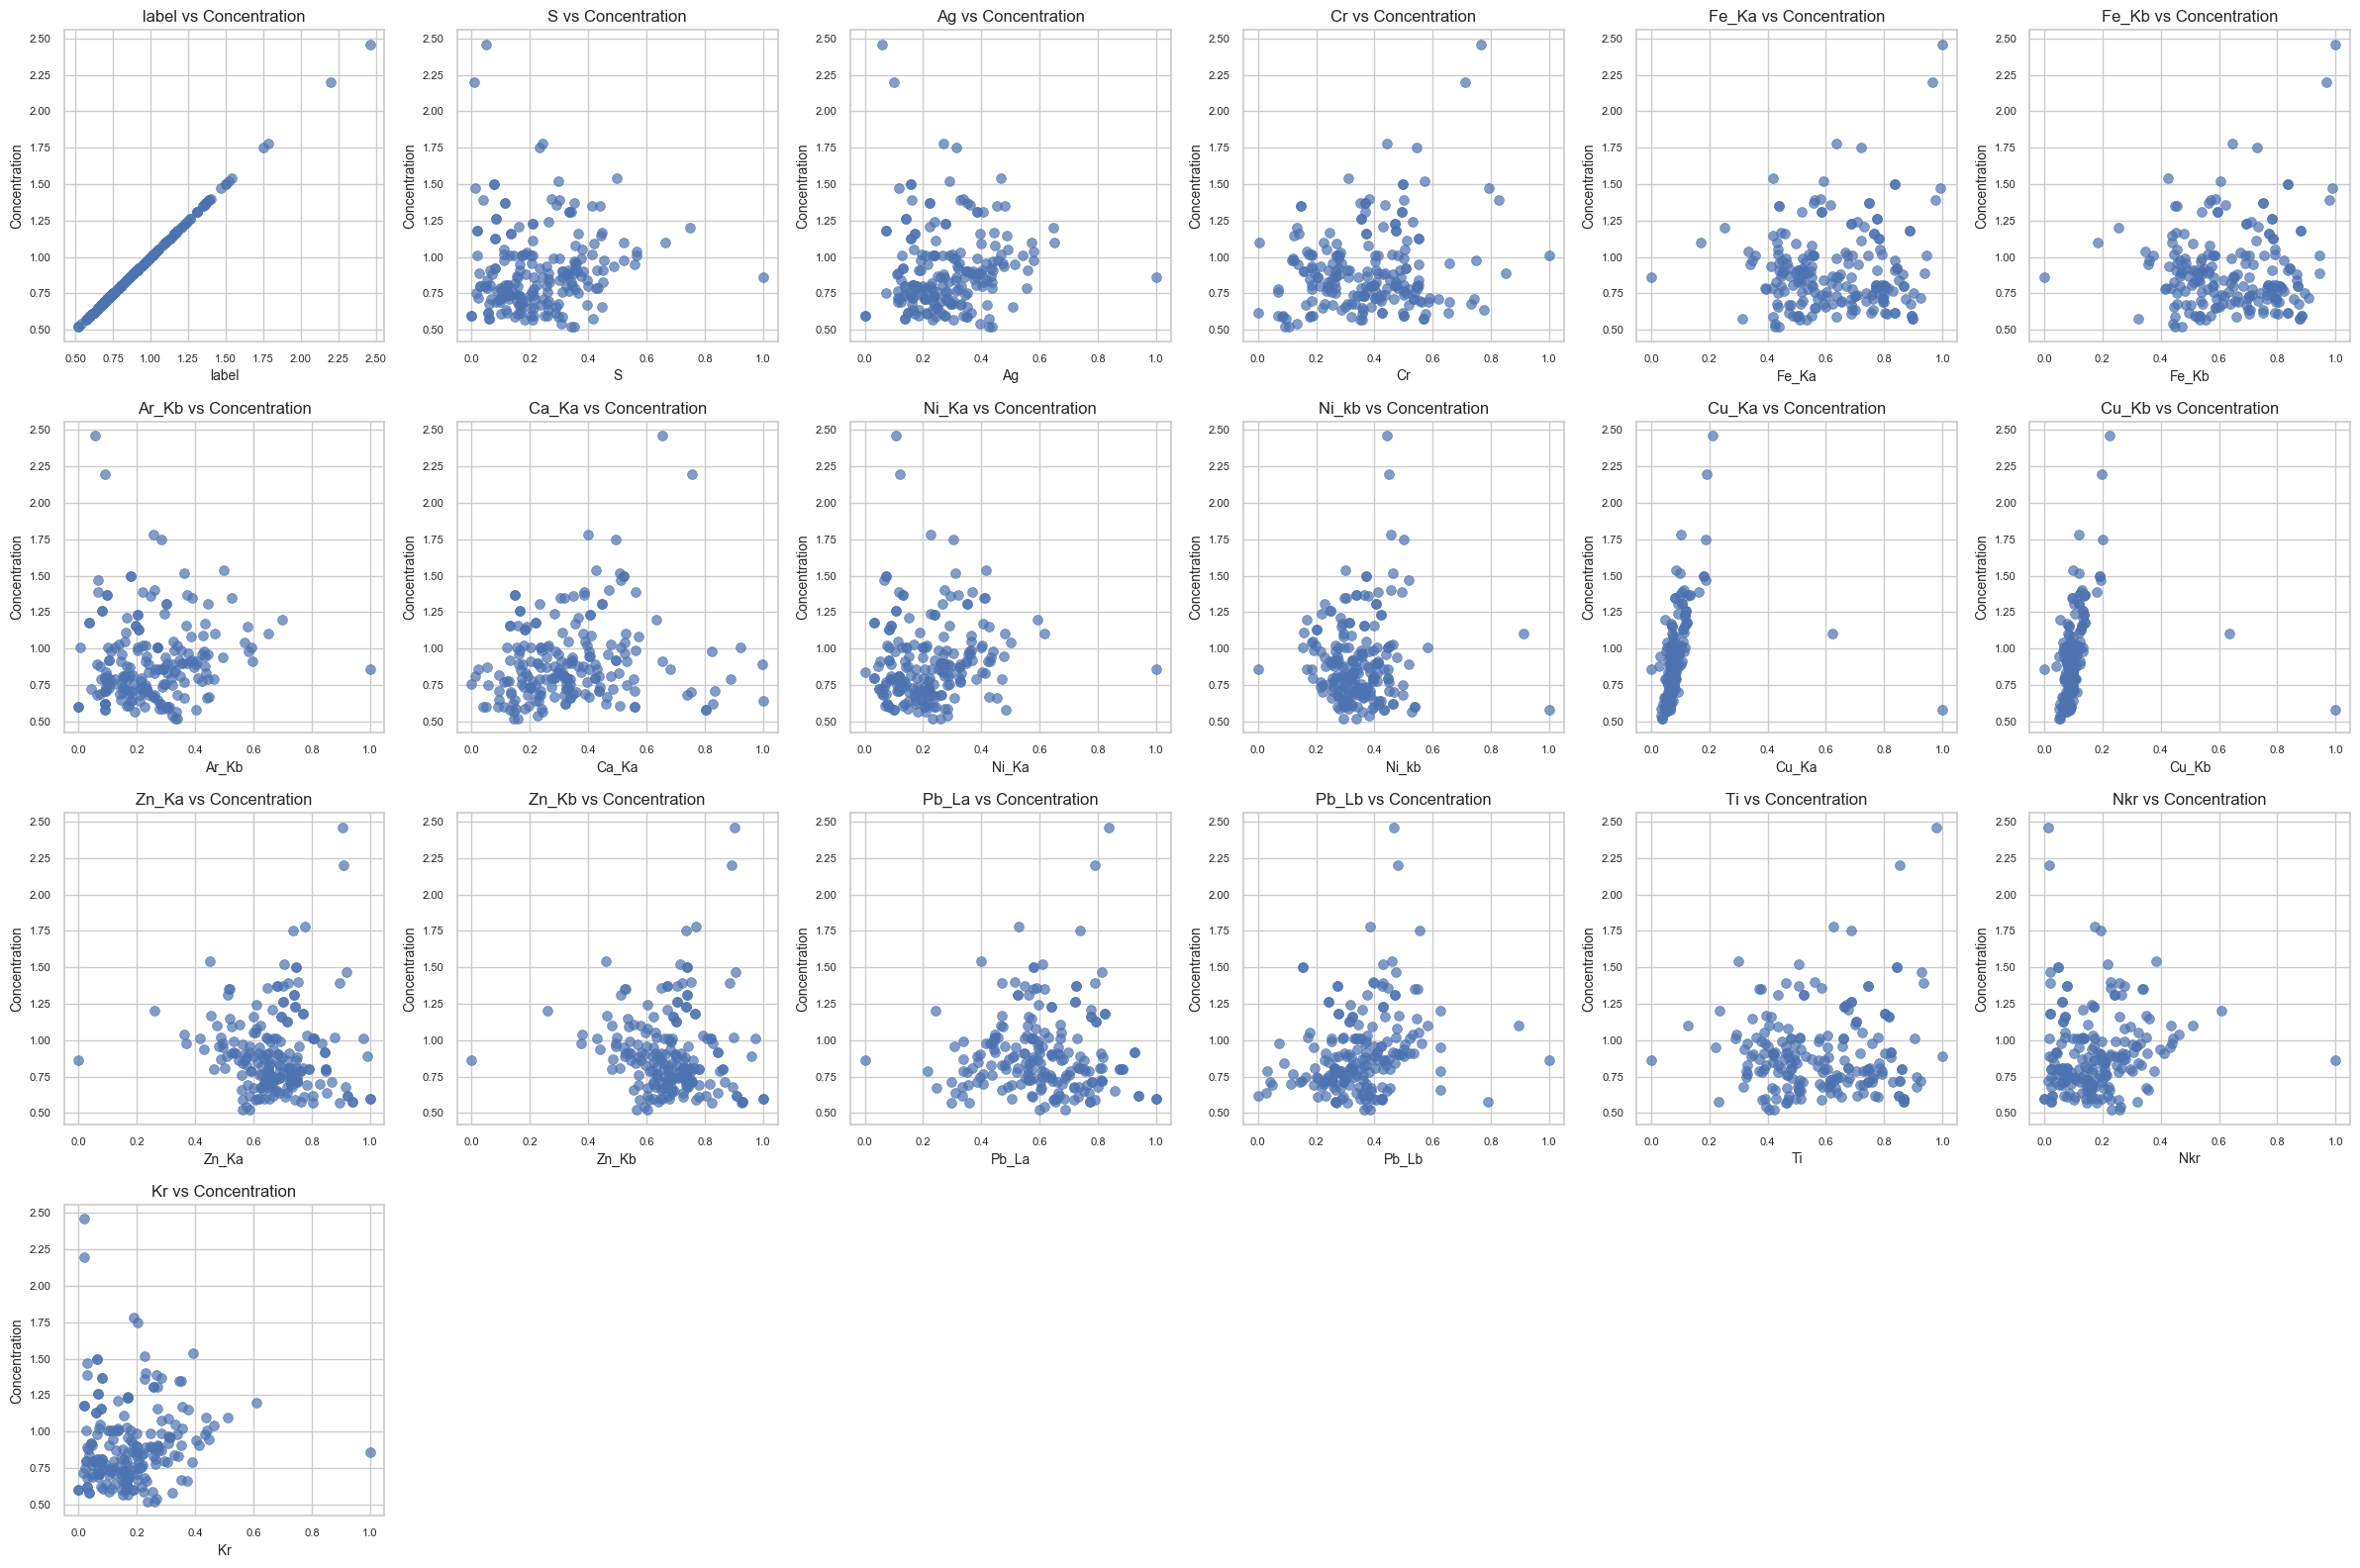

In [8]:
import math
features = ['label', 'S', 'Ag', 'Cr', 'Fe_Ka', 'Fe_Kb', 'Ar_Kb', 'Ca_Ka', 'Ni_Ka',
       'Ni_kb', 'Cu_Ka', 'Cu_Kb', 'Zn_Ka', 'Zn_Kb', 'Pb_La', 'Pb_Lb', 'Ti',
       'Nkr', 'Kr']
n_cols = 6
n_features = len(features)
n_rows = math.ceil(n_features / n_cols)

sns.set(style="whitegrid")


fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='label', ax=axes[i], s=50, alpha=0.7, edgecolor=None)
    axes[i].set_title(f'{feature} vs Concentration', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Concentration', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

for ax in axes[n_features:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


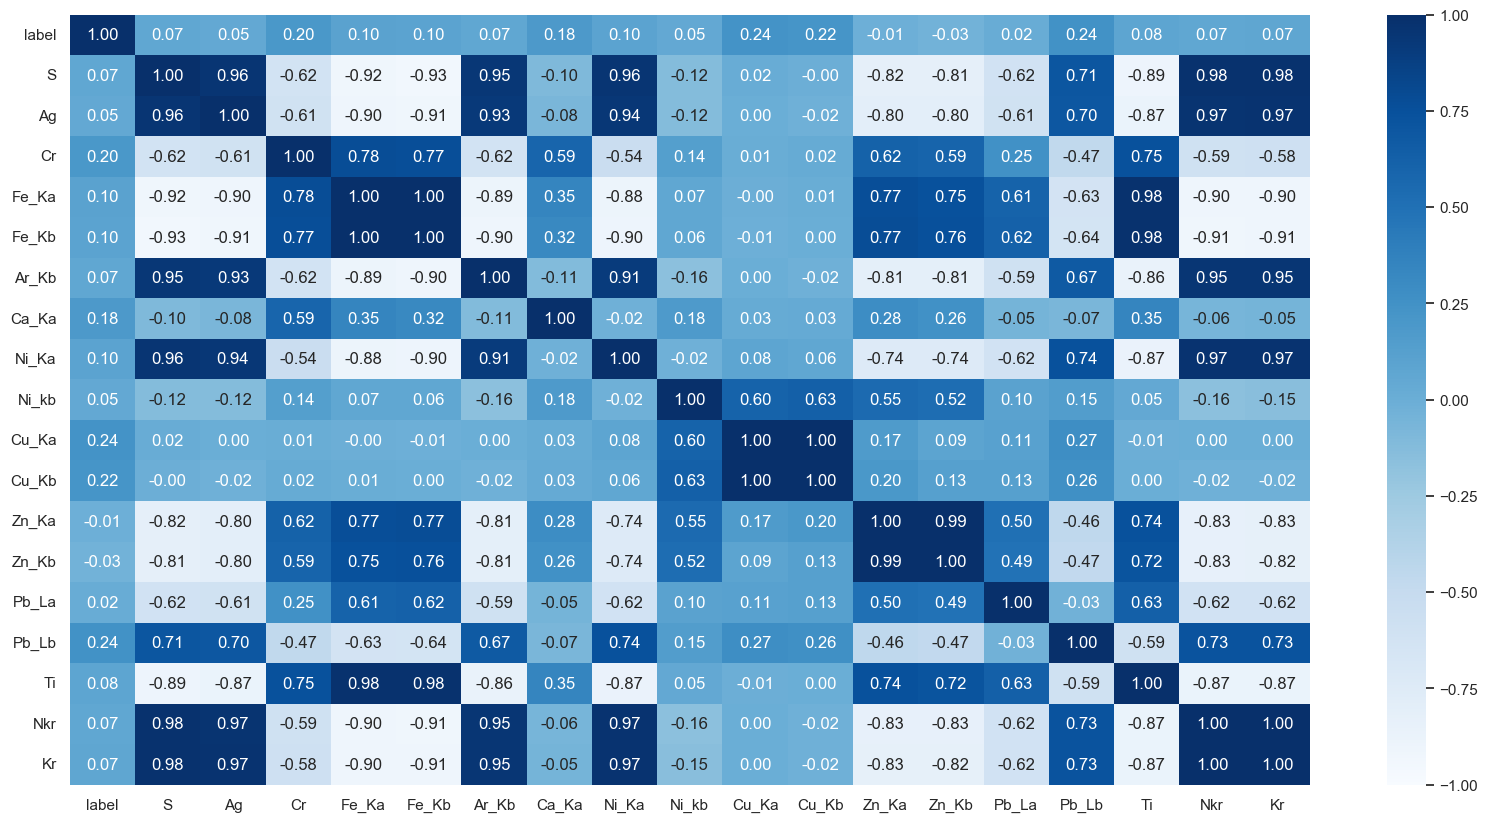

In [9]:
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True,
            cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = scaled_df[features]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [11]:
train_data = [(np.array(x).reshape(-1, 1), y)
                 for x, y in zip(X_train.values.tolist(), y_train.values.tolist())]
test_data = [(np.array(x).reshape(-1, 1), y)
             for x, y in zip(X_test.values.tolist(), y_test.values.tolist())]

In [12]:
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)

In [13]:
class Network(object):

    def __init__(self, sizes):
        set_seed(42)
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        set_seed(42)
        n = len(training_data)
        epoch_losses = []

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k + mini_batch_size]
                            for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)

            epoch_loss = self.calculate_loss(training_data)
            epoch_losses.append(epoch_loss)

        return epoch_losses

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - (eta / len(mini_batch)) *
                        nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(mini_batch)) * nb for b,
                       nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        delta = self.cost_derivative(
            activations[-1], y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations - y)

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def calculate_loss(self, data):
        loss = 0
        for x, y in data:
            output = self.feedforward(x)
            loss += np.sum((output - y) ** 2)
        return loss / len(data)

In [14]:
net = Network([len(features), 50, 25, 1])
epoch_losses = net.SGD(train_data, epochs=3000,
                       mini_batch_size=64, eta=0.01, test_data=test_data)

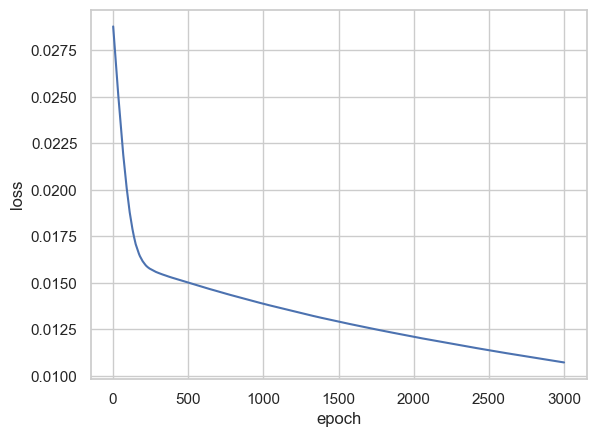

In [15]:
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [16]:
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt

def get_predictions(model, data):
    predictions = []
    for x, _ in data:
        predictions.append(model.feedforward(x))
    return predictions

def plot_predictions(train_data, train_predictions, test_data, test_predictions):
    # Получаем истинные и предсказанные значения для обучающего набора
    train_true_values = [y for _, y in train_data]
    train_predicted_values = [pred[0] for pred in train_predictions]

    # Получаем истинные и предсказанные значения для тестового набора
    test_true_values = [y for _, y in test_data]
    test_predicted_values = [pred[0] for pred in test_predictions]

    # Интерполяция данных для сглаживания
    def smooth_line(values):
        x_original = np.arange(len(values))
        x_new = np.linspace(0, len(values) - 1, len(values) * 10)  # Увеличение количества точек
        spline = make_interp_spline(x_original, values, k=3)  # Кубический сплайн
        return x_new, spline(x_new)

    # Интерполируем значения для обучающего набора
    train_x_smooth, train_true_smooth = smooth_line(train_true_values)
    _, train_predicted_smooth = smooth_line(train_predicted_values)

    # Интерполируем значения для тестового набора
    test_x_smooth, test_true_smooth = smooth_line(test_true_values)
    _, test_predicted_smooth = smooth_line(test_predicted_values)

    # Создаем фигуру с двумя подграфиками
    plt.figure(figsize=(12, 10))

    # График для обучающего набора
    plt.subplot(2, 1, 1)
    plt.plot(train_x_smooth, train_true_smooth, label='Истинные значения (Train)', color='green')
    plt.plot(train_x_smooth, train_predicted_smooth, label='Предсказанные значения (Train)', color='red')
    plt.title('Предсказания на обучающем наборе')
    plt.xlabel('Объект')
    plt.ylabel('Концентрация')
    plt.legend()
    plt.grid(True)

    # График для тестового набора
    plt.subplot(2, 1, 2)
    plt.plot(test_x_smooth, test_true_smooth, label='Истинные значения (Test)', color='green')
    plt.plot(test_x_smooth, test_predicted_smooth, label='Предсказанные значения (Test)', color='red')
    plt.title('Предсказания на тестовом наборе')
    plt.xlabel('Событие')
    plt.ylabel('Концентрация')
    plt.legend()
    plt.grid(True)

    # Подгоняем расположение подграфиков
    plt.tight_layout()
    plt.show()

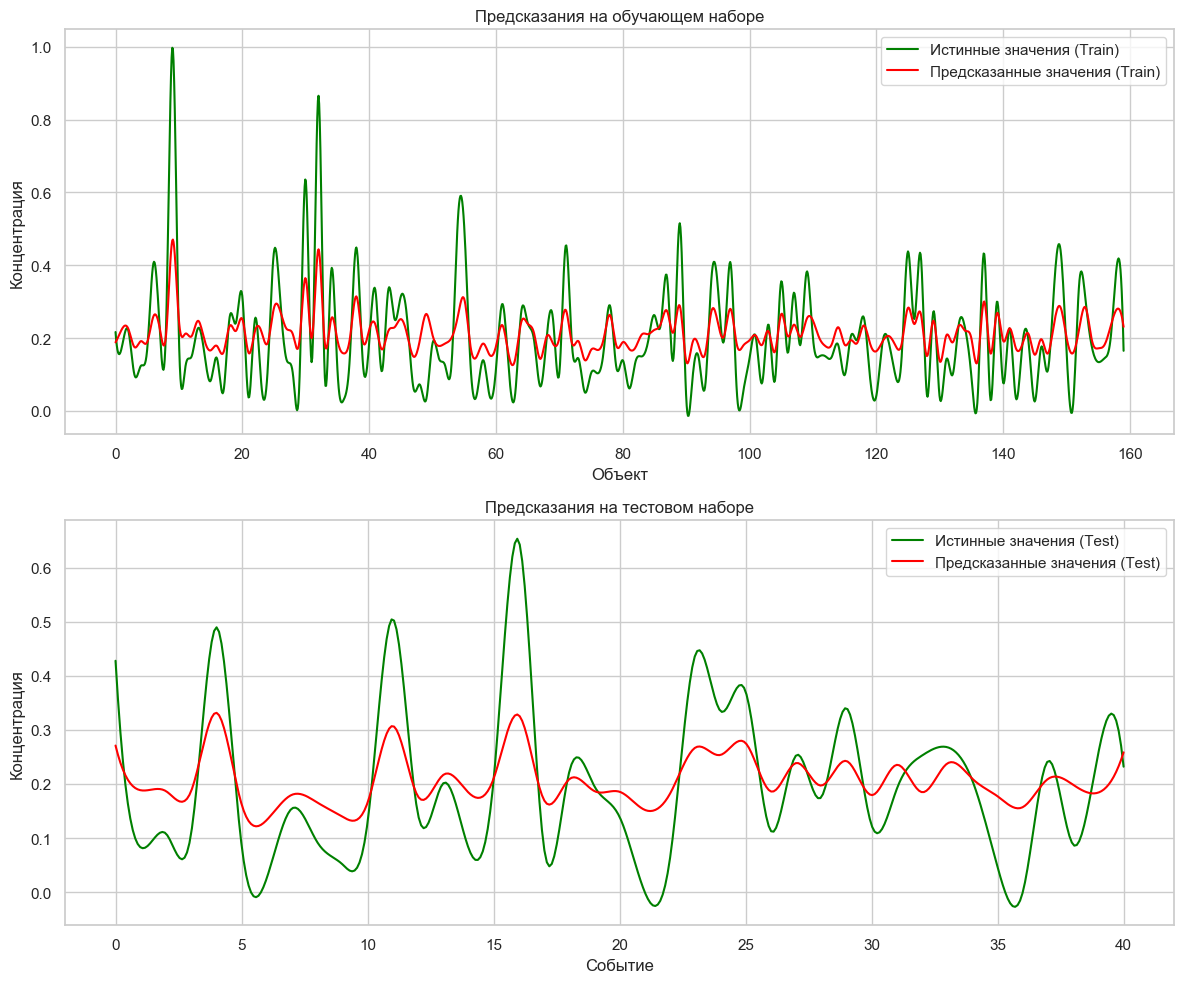

In [17]:
test_predictions = get_predictions(net, test_data)
train_predictions = get_predictions(net, train_data)
plot_predictions(train_data, train_predictions, test_data, test_predictions)

In [18]:
correlation_matrix = scaled_df.drop(columns=['label']).corr()
label_correlation = scaled_df.corr()['label']
columns_to_drop = set()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and (correlation_matrix.loc[col1, col2] > 0.8):
            if label_correlation[col1] >= label_correlation[col2]:
                columns_to_drop.add(col2)
            else:
                columns_to_drop.add(col1)

filtered_df = scaled_df.drop(columns=columns_to_drop)

filtered_df.head()

,label,Cr,Fe_Ka,Ca_Ka,Ni_Ka,Ni_kb,Cu_Ka,Zn_Ka,Pb_La,Pb_Lb
0,0.634021,0.545376,0.721069,0.492815,0.303459,0.500176,0.187549,0.737144,0.737475,0.556190
1,0.489691,0.793318,0.991717,0.511980,0.064954,0.516423,0.187322,0.920373,0.812522,0.473542
2,0.448454,0.827570,0.974607,0.563065,0.118139,0.494226,0.163690,0.895705,0.788664,0.399465
3,1.000000,0.764076,1.000000,0.652656,0.108286,0.443447,0.212785,0.906779,0.836439,0.464816
4,0.865979,0.712293,0.966873,0.756323,0.121018,0.450786,0.191769,0.908752,0.789741,0.479420


In [19]:
filtered_df.columns

Index(['label', 'Cr', 'Fe_Ka', 'Ca_Ka', 'Ni_Ka', 'Ni_kb', 'Cu_Ka', 'Zn_Ka',
       'Pb_La', 'Pb_Lb'],
      dtype='object')

In [20]:
features = ['Cr', 'Fe_Ka', 'Ca_Ka', 'Ni_Ka', 'Ni_kb', 'Cu_Ka', 'Zn_Ka','Pb_La', 'Pb_Lb']
X = filtered_df[features]
y = filtered_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [21]:
train_data = [(np.array(x).reshape(-1, 1), y)
                 for x, y in zip(X_train.values.tolist(), y_train.values.tolist())]
test_data = [(np.array(x).reshape(-1, 1), y)
             for x, y in zip(X_test.values.tolist(), y_test.values.tolist())]

In [22]:
net = Network([len(features), 50, 25, 1])
epoch_losses = net.SGD(train_data, epochs=3000,
                       mini_batch_size=64, eta=0.01, test_data=test_data)

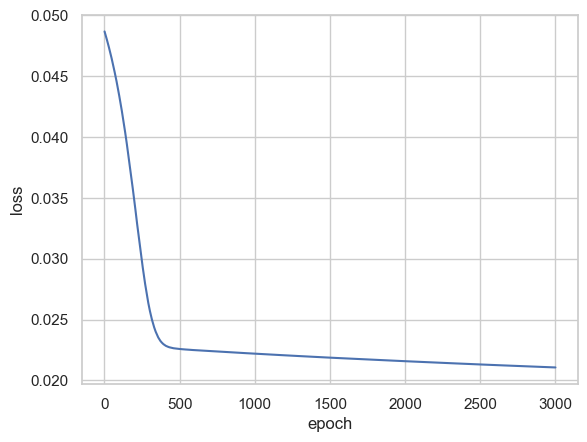

In [23]:
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

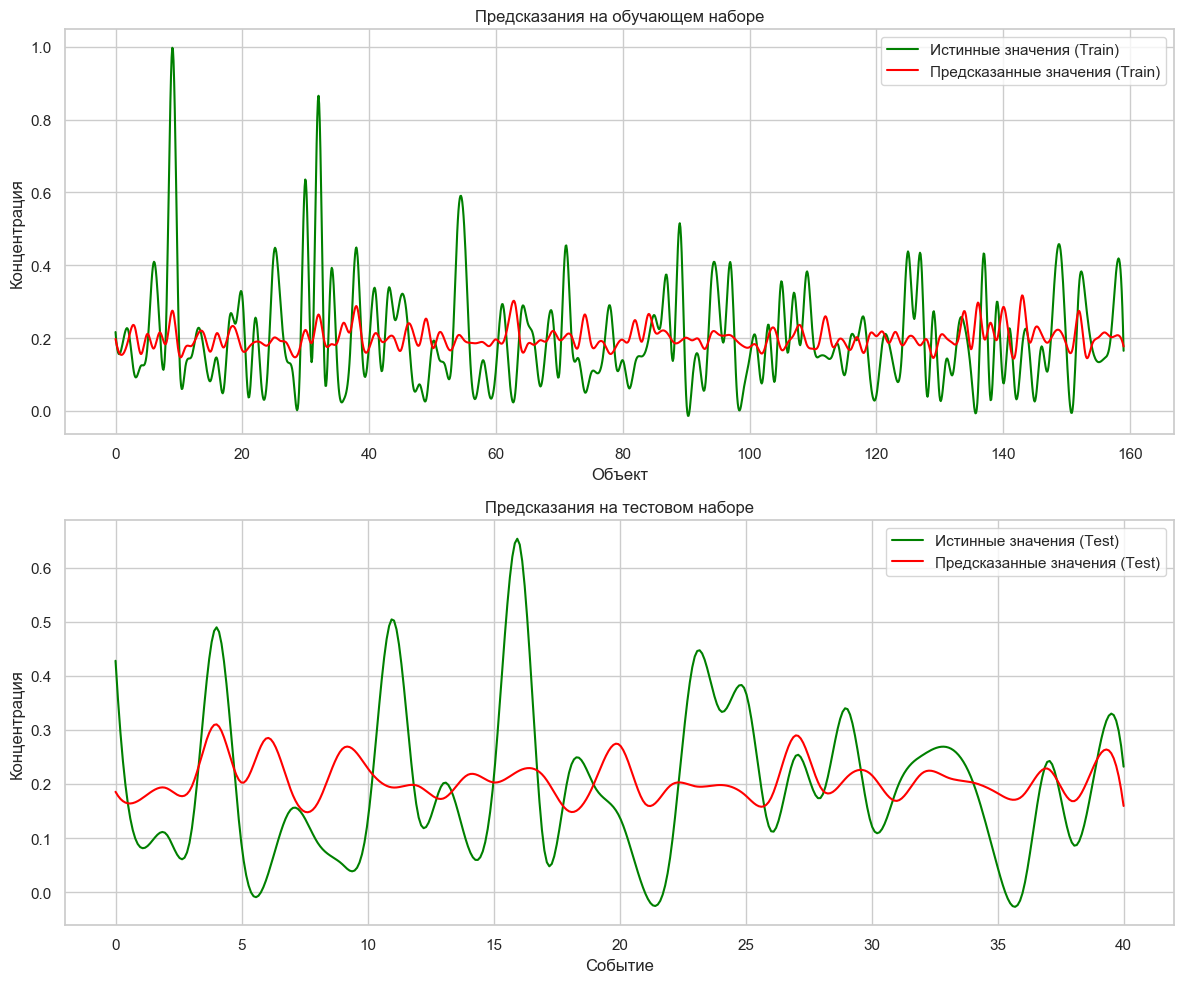

In [24]:
test_predictions = get_predictions(net, test_data)
train_predictions = get_predictions(net, train_data)
plot_predictions(train_data, train_predictions, test_data, test_predictions)